## This notebook is an optional accompaniment to the Day 1 Statistics Short-Course

### Show how Python can generate random variable outcomes

In [1]:
import random  # standard library random module
random.seed(1)

In [2]:
X = random.random()  # random, uniform number between 0 and 1
print(X)

0.13436424411240122


In [3]:
X = 1 + 5 * random.random()  # random, uniform number between 1 and 6
print(X)

5.237168684686163


In [4]:
X = random.uniform(1, 6)  # another way to do it using the uniform distribution
print(X)

4.81887309488307


In [5]:
X = random.randint(1, 6)  # random integer between 1 and 6
print(X)

3


In [6]:
flip = random.choice(['Heads', 'Tails'])
print(flip)

Heads


## Probability, Statistics, or both?

1. You were rolling a 6-sided die and you rolled five 6s in a row. Do you think it’s
fair?

2. With a fair die, how likely is it to roll five 6s in a row?

3. You got an average of 4 robocalls per day last week. How many do you think
you’ll get today?

4. In a mobile phone manufacturing line, 1 phone is found to be defective per
1000 phones. You watched the process and saw 1500 phones go by until 1 was
rejected. Was the failure rate incorrect?

5. You’re a teacher grading your students’ tests:   
   a. You plot a histogram of the results and find that they’re well described by a
normal distribution with a mean of 75%, standard deviation of 5%.

5. You’re a teacher grading your students’ tests:   
    b. Another teachers’ top student scores 100% on the exam. Is she a better
teacher than you are?

## Arrangments and Permuations, you try

1. How many different car number plates are possible with 3 digits followed by 3 letters?

2. 4 girls and 3 boys are sitting on a bench.  
   a. How many different ways could they sit if there were no restrictions?

2. 4 girls and 3 boys are sitting on a bench.  
    b. How many different ways could they sit if the ordered needed to alternate girl-boy? (starting with girl)

3. In a 100 m dash with 10 athletes, how many different ways could they finish first, second, and third?

## Combinations, you try  

A committee of 5 people is to be chosen from 6 men and 4 women.

1. How many committees are possible?

2. There’s a desire to keep the ratio of men to women the same. How many committees are possible with 3 men and 2 women?

3. A woman majority committee is desired. How many woman-majority committees are possible?

## Discrete distributions

In [7]:
# for plotting
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

# for statistical distributions
from scipy import stats

# for numpy functions
import numpy as np

### Bernoulli

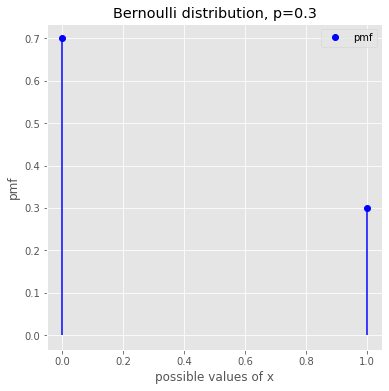

In [8]:
p = 0.3 # probability of success

bernoulli = stats.bernoulli(p) # make a bernoulli distrbution object

x_low = bernoulli.ppf(0.01)  # low range of distribution to plot
x_high = bernoulli.ppf(0.99) # upper range of distribution to plot

y_low = bernoulli.pmf(x_low)
y_high = bernoulli.pmf(x_high)

x = [x_low, x_high]
y = [y_low, y_high]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.plot(x, y, 'bo', label='pmf')
ax.vlines(x, 0, y, colors='b')
ax.set_xlabel('possible values of x')
ax.set_ylabel('pmf')
ax.set_title(f"Bernoulli distribution, p={p}")
ax.legend();

In [9]:
n = 5 # want 5 random samples from the distribution
rv = bernoulli.rvs(n)
print(rv)

[0 0 0 0 0]


In [10]:
# what's the probability of a certain outcome (0, or 1)?
bernoulli.pmf(1)

0.3

### Binomial

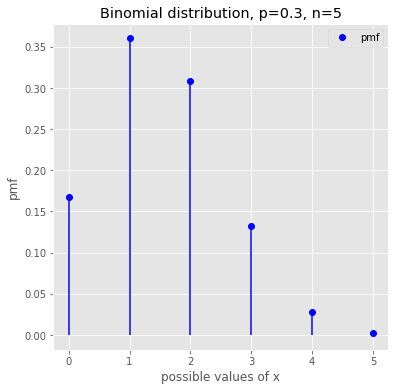

In [11]:
p = 0.3 # probability of success
n = 5   # number of trials

binomial = stats.binom(n, p) # make a binomial distrbution object

x_low = binomial.ppf(0.01)  # low range of distribution to plot
x_high = binomial.ppf(0.999) # upper range of distribution to plot

x = np.arange(x_low, x_high+1)
y = binomial.pmf(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.plot(x, y, 'bo', label='pmf')
ax.vlines(x, 0, y, colors='b')
ax.set_xlabel('possible values of x')
ax.set_ylabel('pmf')
ax.set_title(f"Binomial distribution, p={p}, n={n}")
ax.legend();

In [12]:
n = 10 # want 10 random samples from the distribution
rv = binomial.rvs(n)
print(rv)

[3 2 2 1 1 3 1 1 1 1]


In [13]:
# what's the probability of 2 successes?
binomial.pmf(2)

0.3086999999999999

### Geometric  
See example [here.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html)

### Poisson
See example [here.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

## Continuous distributions

### Uniform

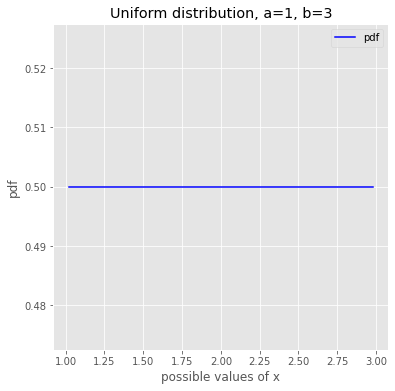

In [14]:
a = 1 # lower bound
b = 3 # upper bound

scale = b - a

uniform = stats.uniform(a, scale) # make a uniform distrbution object

x_low = uniform.ppf(0.01)  # low range of distribution to plot
x_high = uniform.ppf(0.99) # upper range of distribution to plot

x = np.linspace(x_low, x_high)
y = uniform.pdf(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.plot(x, y, 'b-', label='pdf')
ax.set_xlabel('possible values of x')
ax.set_ylabel('pdf')
ax.set_title(f"Uniform distribution, a={a}, b={b}")
ax.legend();

In [15]:
n = 10 # want 10 random samples from the distribution
rv = uniform.rvs(n)
print(rv)

[1.06390403 1.38307633 1.3937215  1.5619903  1.5942923  2.63199832
 2.46154072 1.20981399 1.42624589 1.32659683]


In [16]:
# what's the probability that a value is between 2 and 1?
uniform.cdf(2) - uniform.cdf(1)

0.5

### Gaussian (normal)

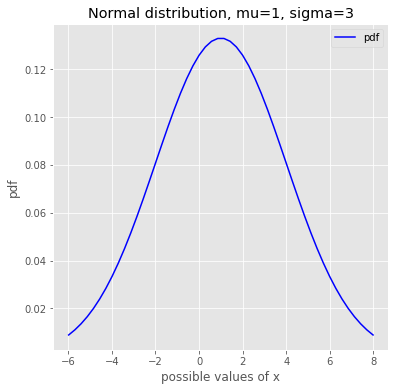

In [17]:
mu = 1    # mean
sigma = 3 # standard deviation

normal = stats.norm(loc=mu, scale=sigma) # make a normal distrbution object

x_low = normal.ppf(0.01)  # low range of distribution to plot
x_high = normal.ppf(0.99) # upper range of distribution to plot

x = np.linspace(x_low, x_high)
y = normal.pdf(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.plot(x, y, 'b-', label='pdf')
ax.set_xlabel('possible values of x')
ax.set_ylabel('pdf')
ax.set_title(f"Normal distribution, mu={mu}, sigma={sigma}")
ax.legend();

In [18]:
n = 10 # want 10 random samples from the distribution
rv = normal.rvs(n)
print(rv)

[-1.19052975 -0.6021211  -3.41119522  1.37384942 -1.67124869 -0.57173049
  6.57335881 -2.79108457 -4.96806122 -3.00573411]


In [19]:
# what's the probability that a value is greater than 5?
1 - normal.cdf(5)

0.09121121972586788

### Exponential distribution

See documentation [here.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)

## Example of statistics and their relevance: Anscombe's Quartet

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


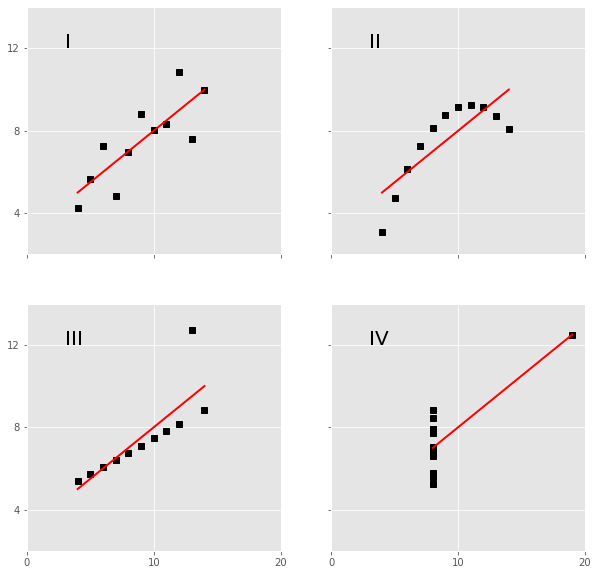

In [20]:
"""
from matplotlib documentation

Edward Tufte uses this example from Anscombe to show 4 datasets of x
and y that have the same mean, standard deviation, and regression
line, but which are qualitatively different.
"""

import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]


def fit(x):
    return 3 + 0.5 * x


fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

xfit = np.array([np.min(x), np.max(x)])
axs[0, 0].plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
axs[0, 1].plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
axs[1, 0].plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
xfit = np.array([np.min(x4), np.max(x4)])
axs[1, 1].plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)

for ax, label in zip(axs.flat, ['I', 'II', 'III', 'IV']):
    ax.label_outer()
    ax.text(3, 12, label, fontsize=20)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

plt.show()